In [1]:
## contents of a fastq file
## below are the first lines to fastq file Coriell-NA12877_R1.fastq
## the first line starts with @ and contains some
####sequence identifying information including with each separated by :
####instrument id (@M indicates MiSeq?), run number, flow cell id, lane number,
####tile number, x and y coordinates of the cluster,
####and read number
####note that this is read 1 of a set of paired end reads

## the next line is the actual sequence

## the fourth line contains the quality scores for each base of a read - 
####note that this line is separated from the sequence
####by a "+" - note that the quality scores are in all
####caps, so the guess is that they are in phred 33
####encoding - the quality score, denoted as Q is -10 log10(P)
#### where P is the probability that the base call is wrong - so
#### the larger the P (i.e. probability that the base call is wrong)
#### the lower the quality score
#### for more on quality scores see https://www.drive5.com/usearch/manual/quality_score.html

! head -4 /mnt/d/variant_call_example/Coriell-NA12877_R1.fastq

@M00974:93:000000000-A5E36:1:1101:1802:14706/1
CTCCCCTTTCGGCTACAAATCACACGTGGGTCTGGCGCACGGGCATGAAGCCCAGTGCACGGAGGACCCAGTGCCACCTGCCTCGCCCGCCATCCCGGCCAGCTTACATTGCCATAGCAGTCCTCGTCGTCTTCCGACATAGCCGGCAGGT
+
CCCCCGCGGGFEGCGGGGGGGF@FFCFFEGGCGDCE+F:FEBED@FDEEEGFGGF<@ECFCFFE7BFGGDEGCEEFFGGGGGGGGGGGGGGGGGCFCFGEEGF<FEGFFF9FFEFGA<<?EFEFGE=F7FGGGDGCEGE@DFEGGGGCGGG


In [2]:
## the first step in genomic data analysis is to determine the quality of sequecing
#### reads.
## a common tool used for this is FastQC
## here we will use

## here we will use --help to see the instructions for running fastqc
! ~/miniconda3/bin/fastqc --help


            FastQC - A high throughput sequence QC analysis tool

SYNOPSIS

	fastqc seqfile1 seqfile2 .. seqfileN

    fastqc [-o output dir] [--(no)extract] [-f fastq|bam|sam] 
           [-c contaminant file] seqfile1 .. seqfileN

DESCRIPTION

    FastQC reads a set of sequence files and produces from each one a quality
    control report consisting of a number of different modules, each one of 
    which will help to identify a different potential type of problem in your
    data.
    
    If no files to process are specified on the command line then the program
    will start as an interactive graphical application.  If files are provided
    on the command line then the program will run with no user interaction
    required.  In this mode it is suitable for inclusion into a standardised
    analysis pipeline.
    
    The options for the program as as follows:
    
    -h --help       Print this help file and exit
    
    -v --version    Print the version of the program and exit

In [3]:
! ~/miniconda3/bin/fastqc /mnt/d/variant_call_example/Coriell-NA12877_R1.fastq /mnt/d/variant_call_example/Coriell-NA12877_R2.fastq

Started analysis of Coriell-NA12877_R1.fastq
Approx 5% complete for Coriell-NA12877_R1.fastq
Approx 10% complete for Coriell-NA12877_R1.fastq
Approx 15% complete for Coriell-NA12877_R1.fastq
Approx 20% complete for Coriell-NA12877_R1.fastq
Approx 25% complete for Coriell-NA12877_R1.fastq
Approx 30% complete for Coriell-NA12877_R1.fastq
Approx 35% complete for Coriell-NA12877_R1.fastq
Approx 40% complete for Coriell-NA12877_R1.fastq
Approx 45% complete for Coriell-NA12877_R1.fastq
Approx 50% complete for Coriell-NA12877_R1.fastq
Approx 55% complete for Coriell-NA12877_R1.fastq
Approx 60% complete for Coriell-NA12877_R1.fastq
Approx 65% complete for Coriell-NA12877_R1.fastq
Approx 70% complete for Coriell-NA12877_R1.fastq
Approx 75% complete for Coriell-NA12877_R1.fastq
Approx 80% complete for Coriell-NA12877_R1.fastq
Approx 85% complete for Coriell-NA12877_R1.fastq
Approx 90% complete for Coriell-NA12877_R1.fastq
Approx 95% complete for Coriell-NA12877_R1.fastq
Analysis complete for Cor

In [7]:
## after fastqc completes we see html files with qualit information for each
####fastqc file
## fastqc also generates *.zip for each of the fastq files, use unzip to see
####the contents in these
! ls -la /mnt/d/variant_call_example/

total 64012
drwxrwxrwx 1 joewu joewu     4096 Mar 25 08:52 .
drwxrwxrwx 1 joewu joewu     4096 Mar 24 19:08 ..
-rwxrwxrwx 1 joewu joewu 32247479 Sep 26  2018 Coriell-NA12877_R1.fastq
drwxrwxrwx 1 joewu joewu     4096 Mar 25 08:52 Coriell-NA12877_R1_fastqc
-rwxrwxrwx 1 joewu joewu   247826 Mar 25 08:52 Coriell-NA12877_R1_fastqc.html
-rwxrwxrwx 1 joewu joewu   280427 Mar 25 08:52 Coriell-NA12877_R1_fastqc.zip
-rwxrwxrwx 1 joewu joewu 32246969 Sep 26  2018 Coriell-NA12877_R2.fastq
drwxrwxrwx 1 joewu joewu     4096 Mar 25 08:52 Coriell-NA12877_R2_fastqc
-rwxrwxrwx 1 joewu joewu   243278 Mar 25 08:52 Coriell-NA12877_R2_fastqc.html
-rwxrwxrwx 1 joewu joewu   272186 Mar 25 08:52 Coriell-NA12877_R2_fastqc.zip


In [4]:
! unzip -d /mnt/d/variant_call_example /mnt/d/variant_call_example/Coriell-NA12877_R1_fastqc.zip   
! unzip -d /mnt/d/variant_call_example /mnt/d/variant_call_example/Coriell-NA12877_R2_fastqc.zip 

Archive:  /mnt/d/variant_call_example/Coriell-NA12877_R1_fastqc.zip
   creating: /mnt/d/variant_call_example/Coriell-NA12877_R1_fastqc/
   creating: /mnt/d/variant_call_example/Coriell-NA12877_R1_fastqc/Icons/
   creating: /mnt/d/variant_call_example/Coriell-NA12877_R1_fastqc/Images/
  inflating: /mnt/d/variant_call_example/Coriell-NA12877_R1_fastqc/Icons/fastqc_icon.png  
  inflating: /mnt/d/variant_call_example/Coriell-NA12877_R1_fastqc/Icons/warning.png  
  inflating: /mnt/d/variant_call_example/Coriell-NA12877_R1_fastqc/Icons/error.png  
  inflating: /mnt/d/variant_call_example/Coriell-NA12877_R1_fastqc/Icons/tick.png  
  inflating: /mnt/d/variant_call_example/Coriell-NA12877_R1_fastqc/summary.txt  
  inflating: /mnt/d/variant_call_example/Coriell-NA12877_R1_fastqc/Images/per_base_quality.png  
  inflating: /mnt/d/variant_call_example/Coriell-NA12877_R1_fastqc/Images/per_tile_quality.png  
  inflating: /mnt/d/variant_call_example/Coriell-NA12877_R1_fastqc/Images/per_sequence_qualit

In [6]:
## after unzipping, we see that two directories, Coriell-NA12877_R1_fastqc and
####Coriell-NA12877_R2_fastqc were created
! ls -la /mnt/d/variant_call_example/

total 64012
drwxrwxrwx 1 joewu joewu     4096 Mar 25 08:52 .
drwxrwxrwx 1 joewu joewu     4096 Mar 24 19:08 ..
-rwxrwxrwx 1 joewu joewu 32247479 Sep 26  2018 Coriell-NA12877_R1.fastq
drwxrwxrwx 1 joewu joewu     4096 Mar 25 08:52 Coriell-NA12877_R1_fastqc
-rwxrwxrwx 1 joewu joewu   247826 Mar 25 08:52 Coriell-NA12877_R1_fastqc.html
-rwxrwxrwx 1 joewu joewu   280427 Mar 25 08:52 Coriell-NA12877_R1_fastqc.zip
-rwxrwxrwx 1 joewu joewu 32246969 Sep 26  2018 Coriell-NA12877_R2.fastq
drwxrwxrwx 1 joewu joewu     4096 Mar 25 08:52 Coriell-NA12877_R2_fastqc
-rwxrwxrwx 1 joewu joewu   243278 Mar 25 08:52 Coriell-NA12877_R2_fastqc.html
-rwxrwxrwx 1 joewu joewu   272186 Mar 25 08:52 Coriell-NA12877_R2_fastqc.zip


In [8]:
## here, we can see the contents of the Coriell-NA12877_R1_fastqc directory and
####we can take a look at each of the files and directories,
####in particular the Images directory
! ls -la /mnt/d/variant_call_example/Coriell-NA12877_R1_fastqc

total 304
drwxrwxrwx 1 joewu joewu   4096 Mar 25 08:52 .
drwxrwxrwx 1 joewu joewu   4096 Mar 25 08:52 ..
-rwxrwxrwx 1 joewu joewu  54449 Mar 25 08:52 fastqc_data.txt
-rwxrwxrwx 1 joewu joewu   2980 Mar 25 08:52 fastqc.fo
-rwxrwxrwx 1 joewu joewu 247826 Mar 25 08:52 fastqc_report.html
drwxrwxrwx 1 joewu joewu   4096 Mar 25 08:52 Icons
drwxrwxrwx 1 joewu joewu   4096 Mar 25 08:52 Images
-rwxrwxrwx 1 joewu joewu    595 Mar 25 08:52 summary.txt


In [9]:
! cat /mnt/d/variant_call_example/Coriell-NA12877_R1_fastqc/summary.txt

PASS	Basic Statistics	Coriell-NA12877_R1.fastq
PASS	Per base sequence quality	Coriell-NA12877_R1.fastq
PASS	Per tile sequence quality	Coriell-NA12877_R1.fastq
PASS	Per sequence quality scores	Coriell-NA12877_R1.fastq
FAIL	Per base sequence content	Coriell-NA12877_R1.fastq
FAIL	Per sequence GC content	Coriell-NA12877_R1.fastq
PASS	Per base N content	Coriell-NA12877_R1.fastq
WARN	Sequence Length Distribution	Coriell-NA12877_R1.fastq
WARN	Sequence Duplication Levels	Coriell-NA12877_R1.fastq
PASS	Overrepresented sequences	Coriell-NA12877_R1.fastq
PASS	Adapter Content	Coriell-NA12877_R1.fastq


In [11]:
## the fastqc_data.txt file contains a much more detailed output and verbose
####version of qc results
## a more pratical way is the inspect quality via the images available in the 
####Images directory
!head -15 /mnt/d/variant_call_example/Coriell-NA12877_R1_fastqc/fastqc_data.txt

##FastQC	0.11.9
>>Basic Statistics	pass
#Measure	Value
Filename	Coriell-NA12877_R1.fastq
File type	Conventional base calls
Encoding	Sanger / Illumina 1.9
Total Sequences	92585
Sequences flagged as poor quality	0
Sequence length	32-151
%GC	58
>>END_MODULE
>>Per base sequence quality	pass
#Base	Mean	Median	Lower Quartile	Upper Quartile	10th Percentile	90th Percentile
1	33.77330021061727	34.0	34.0	34.0	34.0	34.0
2	33.761116811578546	34.0	34.0	34.0	34.0	34.0


In [23]:
! ls /mnt/d/variant_call_example/Coriell-NA12877_R1_fastqc/Images 

adapter_content.png	       per_sequence_gc_content.png
duplication_levels.png	       per_sequence_quality.png
per_base_n_content.png	       per_tile_quality.png
per_base_quality.png	       sequence_length_distribution.png
per_base_sequence_content.png


In [ ]:
## a more effective way to interrogate sequecing quality is through the images
## the first plot tells us that no adapter sequences were observed in the sequencing
####reads, thus we will not need to trim

## the next plot shows duplicate sequence distributions
####for more on sequence duplication see https://www.biostars.org/p/107402/
####and https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/8%20Duplicate%20Sequences.html
####for the Coriell-NA12877_R1.fastq, file, we got a warning regarding 
####sequence duplications

## the next plot shows the N content across all bases for each read - the sequencer
####substitutes the base with N if it is not able to make a base call confidently
####in the Coriell-NA12877_R1.fastq, we do not have any Ns

## the next plot shows the quality score range at each base across all reads in the
####fastq file. in this plot, the red dotted line represents the median of scores,
####the yellow box encapsulates the 25%-75% range of scores, while the whiskers
####represent the 10% and 90% points
####the blue line is the mean score. from the plot, we can see that the quality
####scores are excellent for Coriell-NA12877_R1.fastq
####note that with illumina sequencers, the quality scores tend to drop as base pair
####position increases (https://www.ecseq.com/support/ngs/why-does-the-sequence-quality-decrease-over-the-read-in-illumina)

## we note from the next wo plots that the GC content in Coriell-NA12877_R1.fastq
####is a bit skewed

## fastqc also provides the qualtiy score distributions and sequence length
####distribution

## the per tile sequence score is shown only when sequencing done was done
####using an illumina sequencer and can inform of quality loss in a particular part
####of the flow cell. the score is reported on a cold to hot color scale. cold color
####indicates that quality at a tile was at or above average for a particular base.
####hot color indicates a tile has a lower quality score than others for a particular
####base.

## the fastqc summary and plots are also shown for Coriell-NA12877_R1.fastq

/mnt/d/variant_call_example/Coriell-NA12877_R1_fastqc/Images
['adapter_content.png', 'duplication_levels.png', 'per_base_n_content.png', 'per_base_quality.png', 'per_base_sequence_content.png', 'per_sequence_gc_content.png', 'per_sequence_quality.png', 'per_tile_quality.png', 'sequence_length_distribution.png']


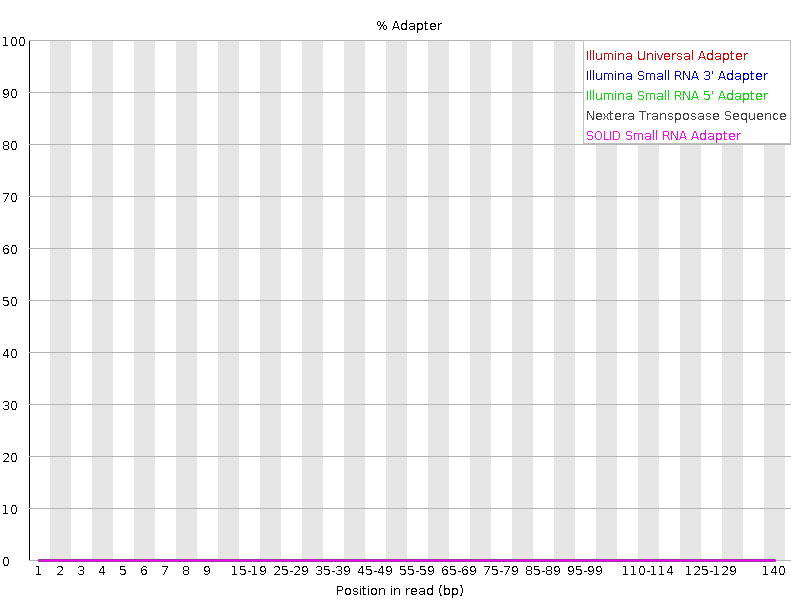

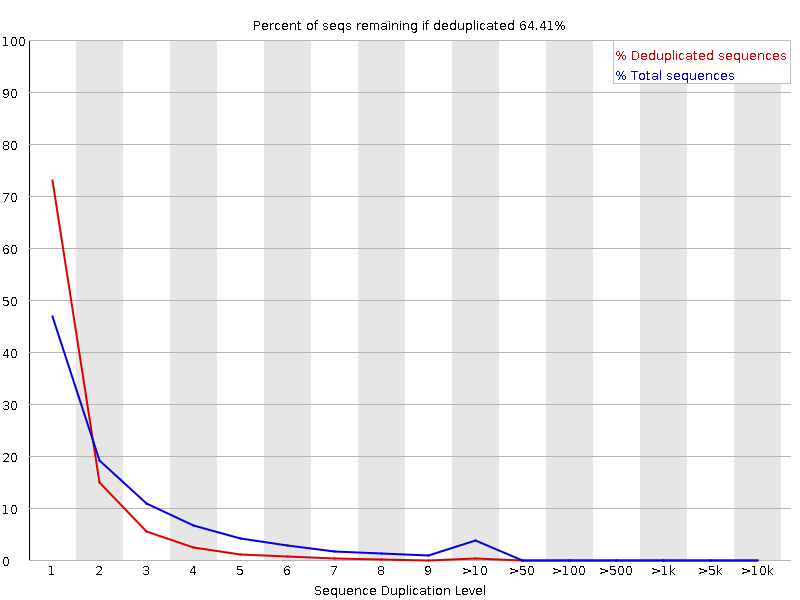

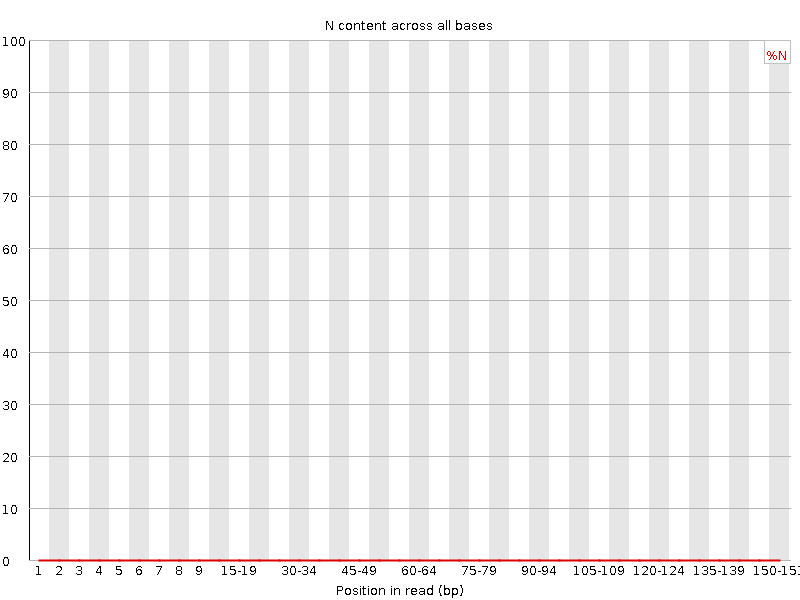

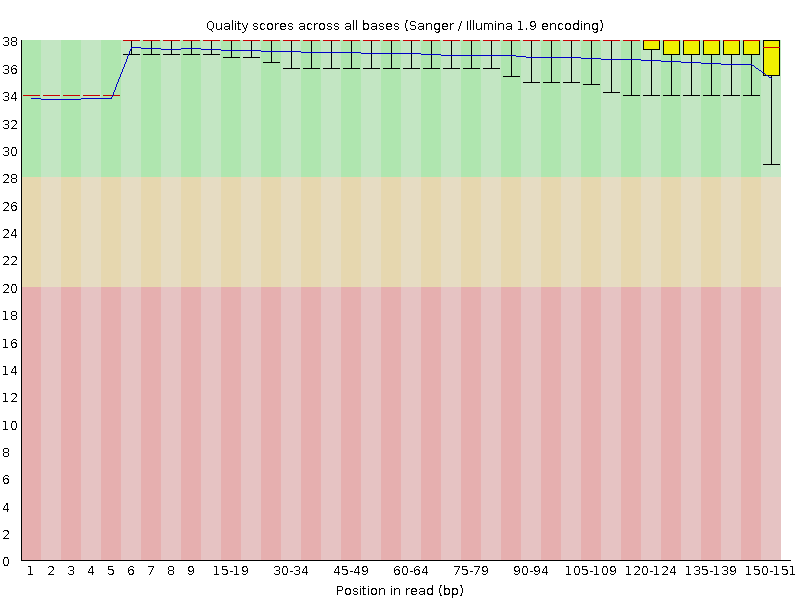

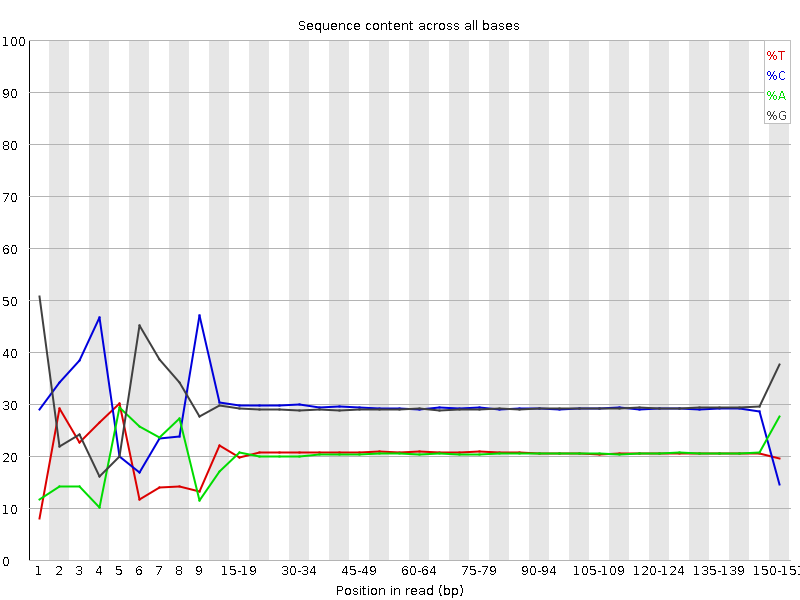

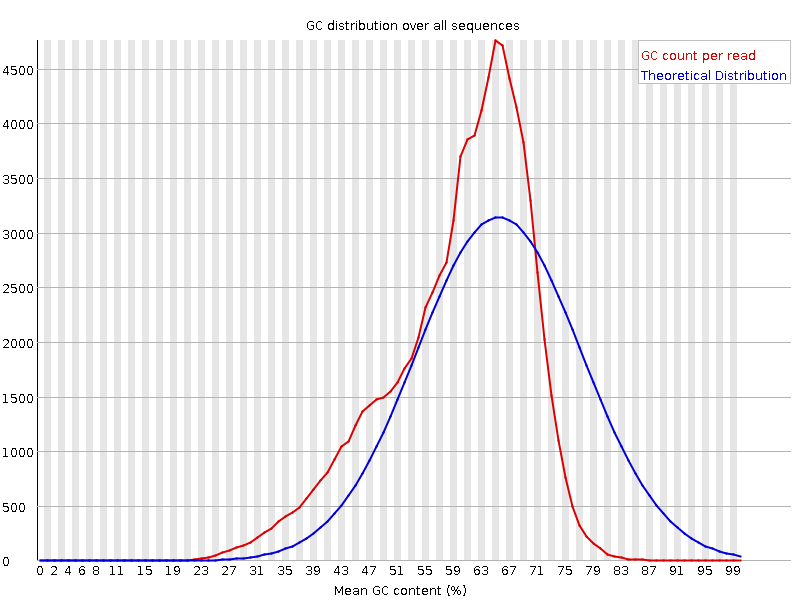

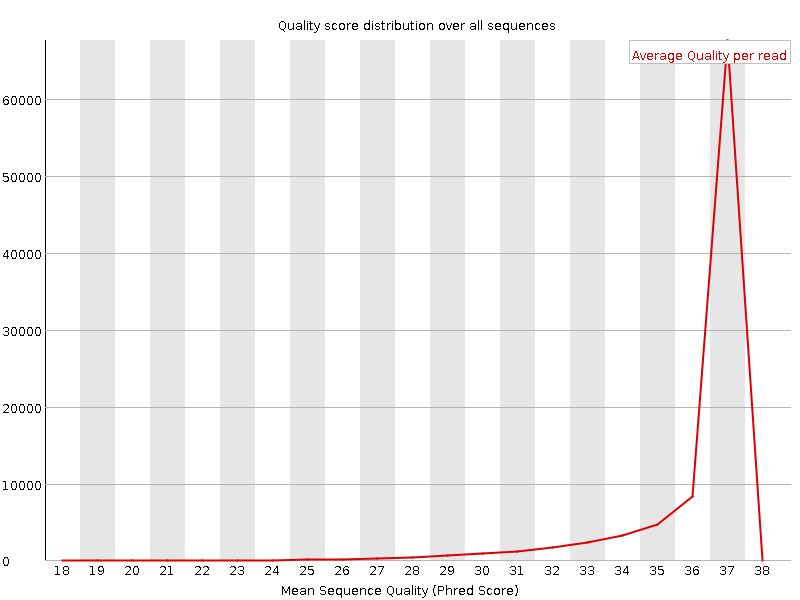

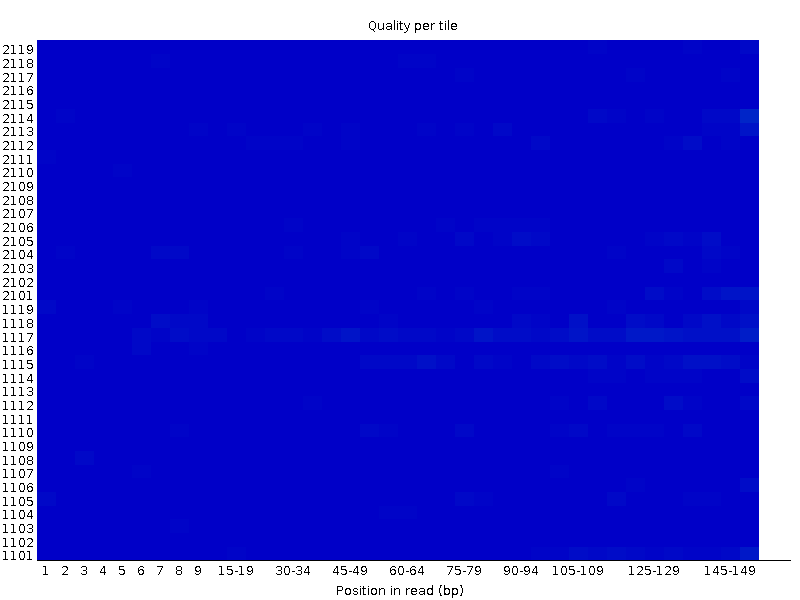

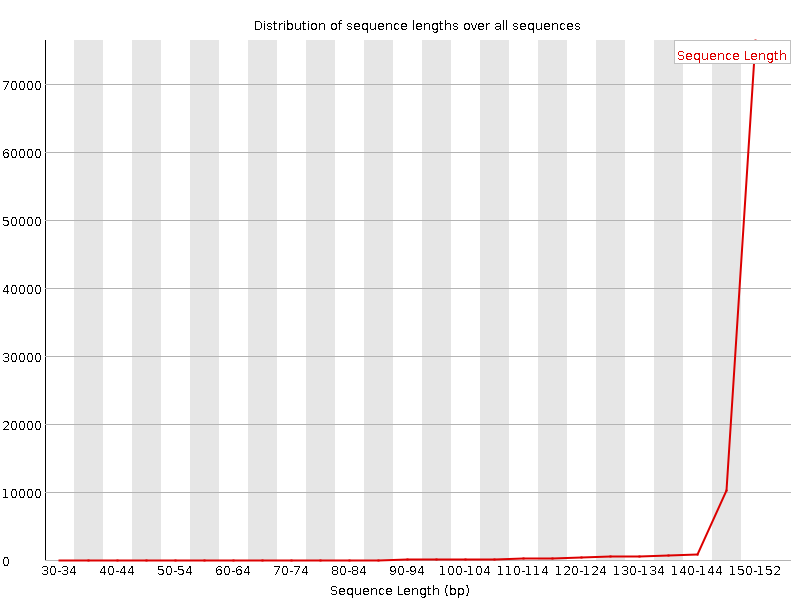

In [35]:
import os
from IPython.display import Image
os.chdir('/mnt/d/variant_call_example/Coriell-NA12877_R1_fastqc/Images/')
dir=os.getcwd()
print(dir)
files=os.listdir('.')
print(files)
for image_name in files:
    display(Image(filename=image_name))

In [37]:
! cat /mnt/d/variant_call_example/Coriell-NA12877_R2_fastqc/summary.txt

PASS	Basic Statistics	Coriell-NA12877_R2.fastq
PASS	Per base sequence quality	Coriell-NA12877_R2.fastq
PASS	Per tile sequence quality	Coriell-NA12877_R2.fastq
PASS	Per sequence quality scores	Coriell-NA12877_R2.fastq
FAIL	Per base sequence content	Coriell-NA12877_R2.fastq
FAIL	Per sequence GC content	Coriell-NA12877_R2.fastq
PASS	Per base N content	Coriell-NA12877_R2.fastq
WARN	Sequence Length Distribution	Coriell-NA12877_R2.fastq
WARN	Sequence Duplication Levels	Coriell-NA12877_R2.fastq
PASS	Overrepresented sequences	Coriell-NA12877_R2.fastq
PASS	Adapter Content	Coriell-NA12877_R2.fastq


/mnt/d/variant_call_example/Coriell-NA12877_R2_fastqc/Images
['adapter_content.png', 'duplication_levels.png', 'per_base_n_content.png', 'per_base_quality.png', 'per_base_sequence_content.png', 'per_sequence_gc_content.png', 'per_sequence_quality.png', 'per_tile_quality.png', 'sequence_length_distribution.png']


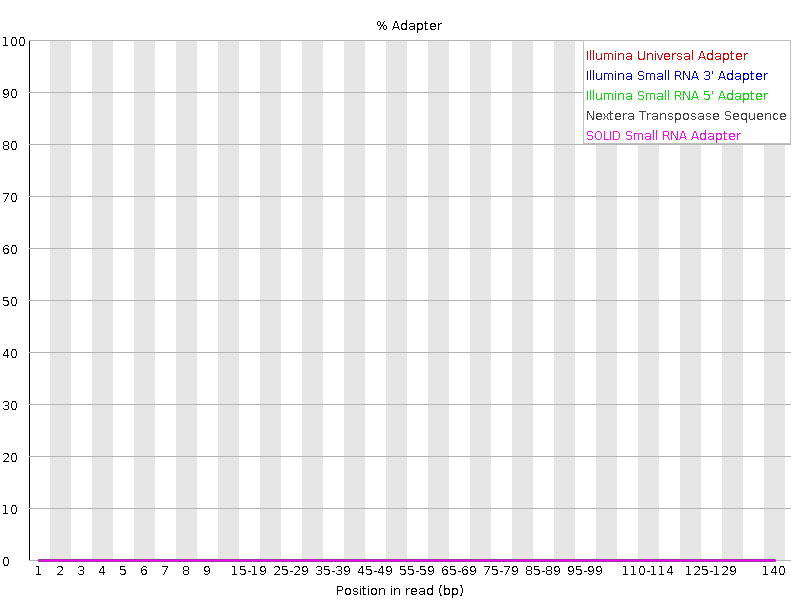

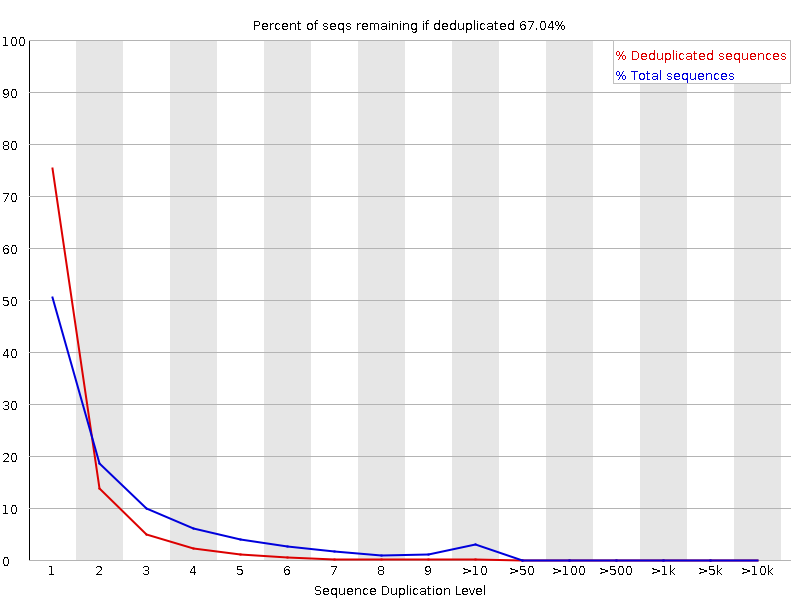

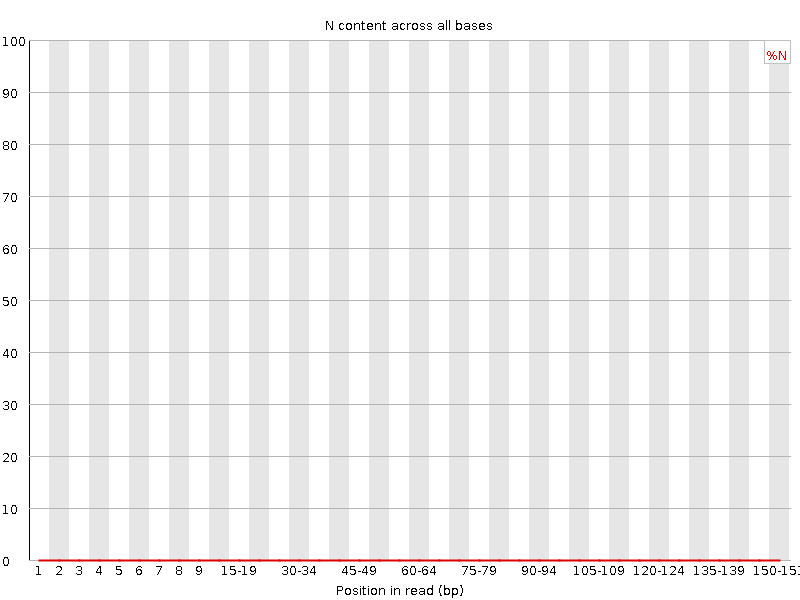

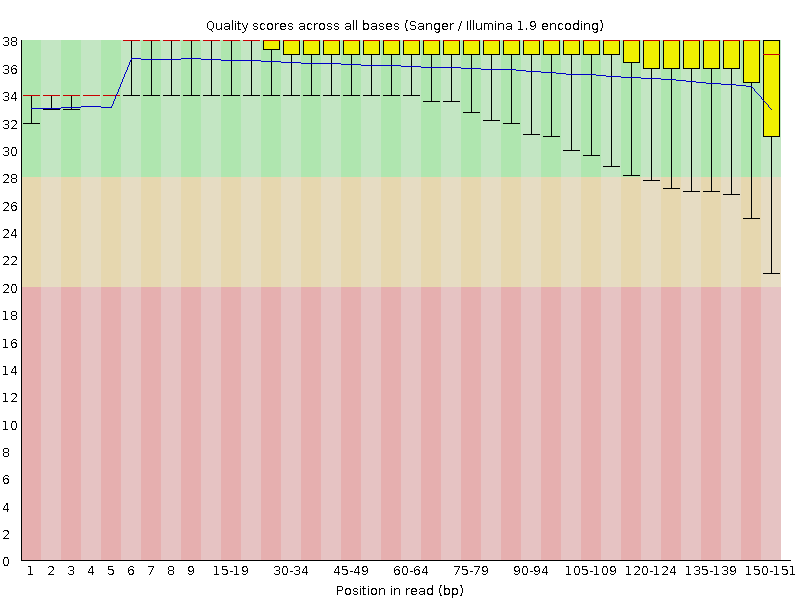

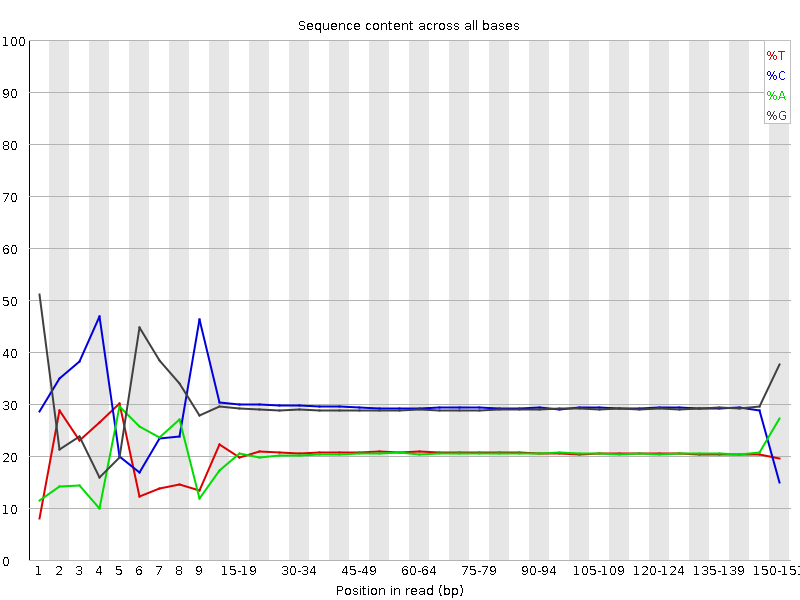

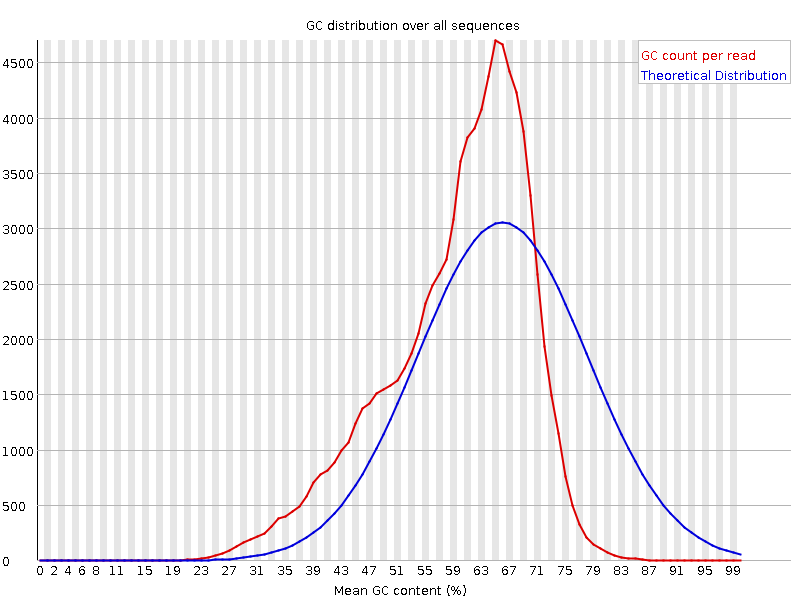

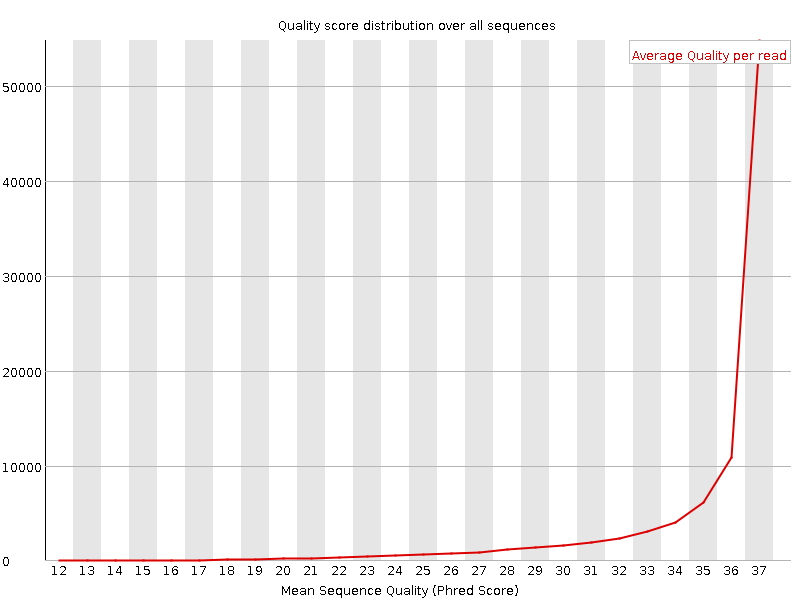

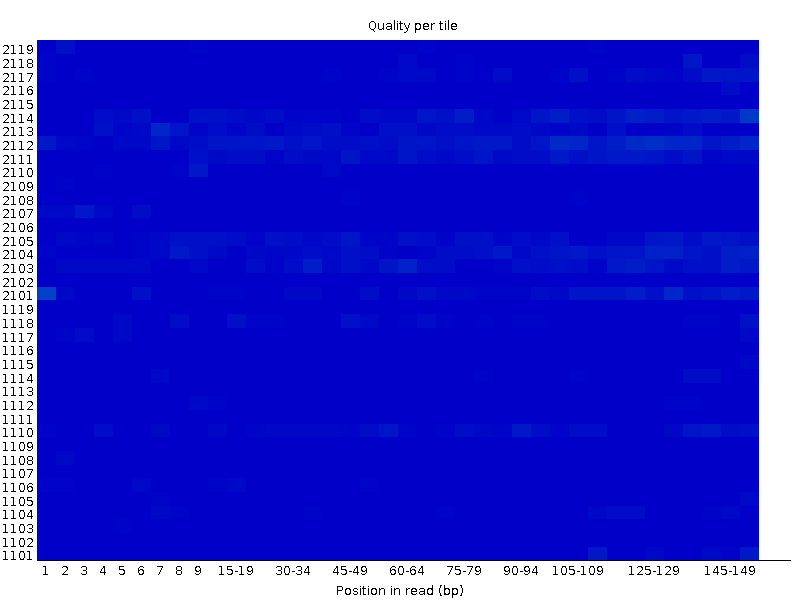

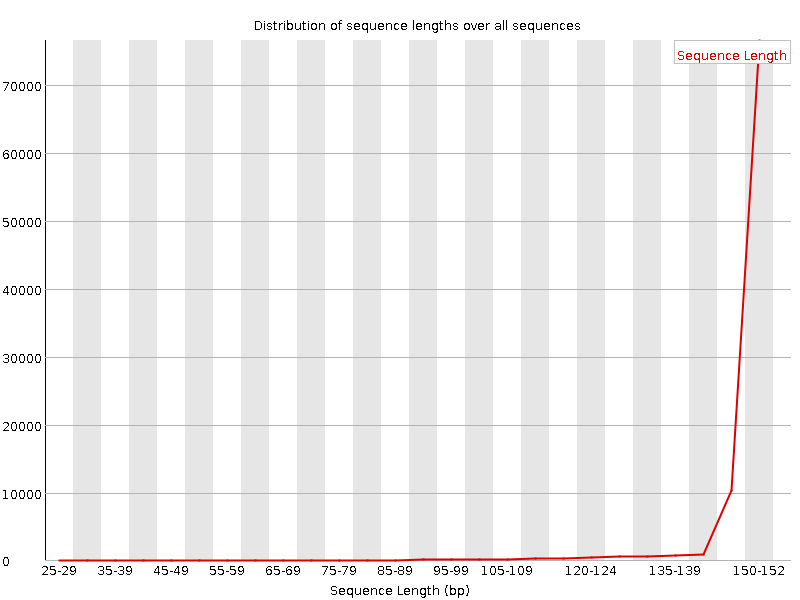

In [36]:
import os
from IPython.display import Image
os.chdir('/mnt/d/variant_call_example/Coriell-NA12877_R2_fastqc/Images/')
dir=os.getcwd()
print(dir)
files=os.listdir('.')
print(files)
for image_name in files:
    display(Image(filename=image_name))

In [38]:
## if all looks good with fastqc then the next step is to assemble the reads
####by aligning to reference

## a good tool for this is Bowtie2